In [127]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
import preprocessing

# Get datasets from CMU data

In [4]:
folder_path = os.path.abspath('MovieSummaries')
df_movies, df_summaries = preprocessing.get_datasets(folderpath=folder_path)

In [6]:
df_genres = preprocessing.get_movie_genres_dataframe(df_movies=df_movies)
df_fictional_summaries, df_fictional = preprocessing.get_fictional_summaries_subset(df_genres=df_genres, df_movies=df_movies, df_summaries=df_summaries, return_df_fictional=True)

   Wikipedia_movie_ID Freebase_genre_ID      movie_genre
0              975900         /m/01jfsb         Thriller
1              975900          /m/06n90  Science Fiction
2              975900          /m/03npn           Horror
3              975900         /m/03k9fj        Adventure
4              975900          /m/0fdjb     Supernatural
The total number of movies referred to as fictional is 5366, corresponding to 6.56% of whole movies.


# Get supp data from IMDB 

In [7]:
imdb_title_genre_df = pd.read_table("Dataset/IMDB/title.basics.tsv/data.tsv", delimiter='\t')

C:\Users\gezas\AppData\Local\Temp\ipykernel_18280\949645751.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  imdb_title_genre_df = pd.read_table("Dataset/IMDB/title.basics.tsv/data.tsv", delimiter='\t')


In [8]:
imdb_title_genre_df

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"
...,...,...,...,...,...,...,...,...,...
10293178,tt9916848,tvEpisode,Episode #3.17,Episode #3.17,0,2009,\N,\N,"Action,Drama,Family"
10293179,tt9916850,tvEpisode,Episode #3.19,Episode #3.19,0,2010,\N,\N,"Action,Drama,Family"
10293180,tt9916852,tvEpisode,Episode #3.20,Episode #3.20,0,2010,\N,\N,"Action,Drama,Family"
10293181,tt9916856,short,The Wind,The Wind,0,2015,\N,27,Short


In [9]:
df_genred = imdb_title_genre_df[~imdb_title_genre_df['genres'].isna()]

# Select rows where "Sci-Fi" or "Fantasy" appear in genres
selected_rows = df_genred[df_genred['genres'].str.contains('Sci-Fi|Fantasy', case=False, regex=True)]

# Print the selected rows
display(selected_rows)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
65,tt0000067,short,Conjurer Making Ten Hats in Sixty Seconds,Dix chapeaux en 60 secondes,0,1896,\N,\N,"Fantasy,Short"
107,tt0000109,short,Rip Meeting the Dwarf,Rip Meeting the Dwarf,0,1896,\N,1,"Fantasy,Short"
108,tt0000110,short,Rip Passing Over the Mountain,Rip Passing Over the Mountain,0,1896,\N,1,"Fantasy,Short"
110,tt0000112,short,Rip's Toast to Hudson,Rip's Toast to Hudson,0,1896,\N,1,"Fantasy,Short"
149,tt0000152,short,The Hallucinated Alchemist,L'hallucination de l'alchimiste,0,1897,\N,2,"Fantasy,Horror,Short"
...,...,...,...,...,...,...,...,...,...
10292827,tt9916106,tvEpisode,The Tingler,The Tingler,0,1968,\N,\N,"Comedy,Drama,Fantasy"
10292828,tt9916108,tvEpisode,The Mad Genius,The Mad Genius,0,1968,\N,\N,"Comedy,Drama,Fantasy"
10292872,tt9916206,tvSeries,Nojor,Nojor,0,2019,\N,20,Fantasy
10292913,tt9916288,video,Rockpaint II,Rockpaint II,0,2019,\N,\N,"Animation,Comedy,Sci-Fi"


In [10]:
df_fictional_imdb = pd.merge(df_movies,
                              selected_rows[[ 'tconst', 'titleType', 'isAdult', 'primaryTitle', 'originalTitle', 'startYear', 'genres']],
                              left_on='movie_name', right_on='primaryTitle', how='inner', suffixes = ['CMU', 'IMDB'])
df_fictional_imdb

,Wikipedia_movie_ID,Freebase_movie_ID,movie_name,movie_release_date,movie_box_office_revenu,movie_runtime,movie_languages,movie_countries,movie_genres,tconst,titleType,isAdult,primaryTitle,originalTitle,startYear,genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",tt0228333,movie,0,Ghosts of Mars,Ghosts of Mars,2001,"Action,Horror,Sci-Fi"
1,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",tt2450324,tvEpisode,0,Ghosts of Mars,Ghosts of Mars,2012,"Action,Comedy,Fantasy"
2,18998739,/m/04jcqvw,The Sorcerer's Apprentice,2002,NaN,86.0,"{""/m/02h40lc"": ""English Language""}","{""/m/0hzlz"": ""South Africa""}","{""/m/0hqxf"": ""Family Film"", ""/m/01hmnh"": ""Fant...",tt0075811,movie,0,The Sorcerer's Apprentice,Carodejuv ucen,1978,"Animation,Family,Fantasy"
3,18998739,/m/04jcqvw,The Sorcerer's Apprentice,2002,NaN,86.0,"{""/m/02h40lc"": ""English Language""}","{""/m/0hzlz"": ""South Africa""}","{""/m/0hqxf"": ""Family Film"", ""/m/01hmnh"": ""Fant...",tt0120166,movie,0,The Sorcerer's Apprentice,The Sorcerer's Apprentice,2001,"Adventure,Family,Fantasy"
4,18998739,/m/04jcqvw,The Sorcerer's Apprentice,2002,NaN,86.0,"{""/m/02h40lc"": ""English Language""}","{""/m/0hzlz"": ""South Africa""}","{""/m/0hqxf"": ""Family Film"", ""/m/01hmnh"": ""Fant...",tt0788639,tvEpisode,0,The Sorcerer's Apprentice,The Sorcerer's Apprentice,1971,"Family,Fantasy"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50837,3868432,/m/0b44p5,Into the Mirror,2003-08-14,NaN,113.0,"{""/m/02hwhyv"": ""Korean Language""}","{""/m/06qd3"": ""South Korea""}","{""/m/03npn"": ""Horror""}",tt0372937,movie,0,Into the Mirror,Geoul sokeuro,2003,"Action,Fantasy,Horror"
50838,3868432,/m/0b44p5,Into the Mirror,2003-08-14,NaN,113.0,"{""/m/02hwhyv"": ""Korean Language""}","{""/m/06qd3"": ""South Korea""}","{""/m/03npn"": ""Horror""}",tt12512352,short,0,Into the Mirror,Into the Mirror,2020,"Comedy,Sci-Fi,Short"
50839,3868432,/m/0b44p5,Into the Mirror,2003-08-14,NaN,113.0,"{""/m/02hwhyv"": ""Korean Language""}","{""/m/06qd3"": ""South Korea""}","{""/m/03npn"": ""Horror""}",tt9882492,tvEpisode,0,Into the Mirror,Into the Mirror,2009,Sci-Fi
50840,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/07s9rl0"": ""Drama""}",tt1816585,tvMovie,0,Mermaids: The Body Found,Mermaids: The Body Found,2011,Sci-Fi


In [11]:
df_fictional_imdb.to_csv('df_fictional_imdb_based.csv')

In [12]:
fictional_wiki_movie_id = df_fictional_imdb['Wikipedia_movie_ID']
df_fictional_summaries_idmb = df_summaries[df_summaries['Wikipedia_movie_ID'].isin(fictional_wiki_movie_id)]
df_fictional_summaries_idmb

,Wikipedia_movie_ID,movie_summary
1,31186339,The nation of Panem consists of a wealthy Capi...
5,5272176,The president is on his way to give a speech. ...
6,1952976,"{{plot}} The film opens in 1974, as a young gi..."
11,18188932,Milan and Goran are two criminals who smuggle ...
13,1335380,The film is based on the events that happened ...
...,...,...
42276,20402406,"In the 13th century, three women accused of wi..."
42279,17736697,Paula Eastman is a Hollywood actress with an ...
42292,26261438,While drinking alone one night and reminiscing...
42293,871575,"{{Plot}} In an alternate universe, people are..."


In [13]:
df_fictional_summaries_idmb.to_csv("df_fictional_summaries_imdb_based.csv")

# Get good summaries dataset

In [43]:
df_fictional_movies = df_movies[df_movies['Wikipedia_movie_ID'].isin(df_fictional['Wikipedia_movie_ID'])]

In [47]:
df_fictional_summaries = pd.merge(df_fictional_summaries, df_movies, on='Wikipedia_movie_ID')
df_fictional_summaries_idmb = pd.merge(df_fictional_summaries_idmb, df_movies, on='Wikipedia_movie_ID')

In [48]:
df_fictional_summaries['release_year'] = pd.to_datetime(df_fictional_summaries['movie_release_date'], format='mixed', errors='coerce').dt.year
df_fictional_summaries_idmb['release_year'] = pd.to_datetime(df_fictional_summaries_idmb['movie_release_date'], format='mixed', errors='coerce').dt.year

In [50]:
df_fictional_summaries_idmb.head()

,Wikipedia_movie_ID,movie_summary,Freebase_movie_ID,movie_name,movie_release_date,movie_box_office_revenu,movie_runtime,movie_languages,movie_countries,movie_genres,release_year
0,31186339,The nation of Panem consists of a wealthy Capi...,/m/0gkz15s,The Hunger Games,2012-03-12,686533290.0,142.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/03btsm8"": ""Action/Adventure"", ""/m/06n90"":...",2012.0
1,5272176,The president is on his way to give a speech. ...,/m/0dbxtv,End Game,2006,NaN,93.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America"", ""/m/...","{""/m/01jfsb"": ""Thriller"", ""/m/03btsm8"": ""Actio...",2006.0
2,1952976,"{{plot}} The film opens in 1974, as a young gi...",/m/068jvg,Dark Water,2005-06-27,49483352.0,105.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/07s9rl0"": ""Drama...",2005.0
3,18188932,Milan and Goran are two criminals who smuggle ...,/m/04cx0gd,Up and Down,2004-09-16,2705163.0,108.0,"{""/m/01wgr"": ""Czech Language"", ""/m/06b_j"": ""Ru...","{""/m/01mjq"": ""Czech Republic""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...",2004.0
4,1335380,The film is based on the events that happened ...,/m/04tng0,Exodus,1960-12-15,NaN,212.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/082gq"": ""War film"", ""/m/06l3bl"": ""Epic"", ...",1960.0


# Let's visualize the data

Text(0.5, 1.0, 'Number of summaries with genres "Science-Fiction" and "Fantasy"')

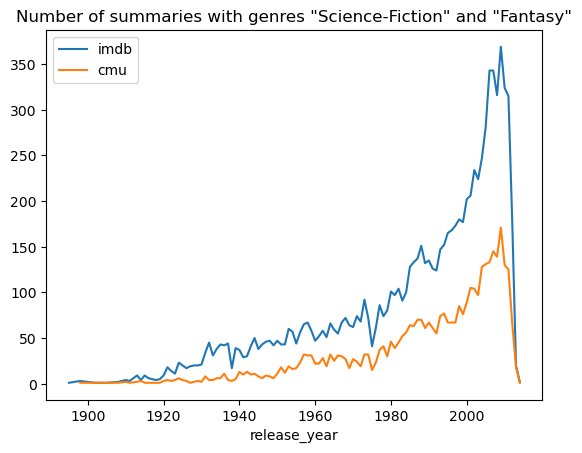

In [53]:
df_fictional_summaries_idmb.groupby('release_year')['Wikipedia_movie_ID'].agg('count').plot(label='imdb')
df_fictional_summaries.groupby('release_year')['Wikipedia_movie_ID'].agg('count').plot(label='cmu')
plt.legend()
plt.title('Number of summaries with genres "Science-Fiction" and "Fantasy"')

In [61]:
# total of movies given as science-fiction or fantasy in CMU wich are also classifed as in IMDB:
cmu_fiction_also_in_imdb = df_fictional_summaries['Wikipedia_movie_ID'].isin(df_fictional_summaries_idmb['Wikipedia_movie_ID'])
cmu_fiction_also_in_imdb

0        True
1        True
2       False
3        True
4        True
        ...  
3936    False
3937     True
3938     True
3939     True
3940     True
Name: Wikipedia_movie_ID, Length: 3941, dtype: bool

In [63]:
df_fictional_summaries[~cmu_fiction_also_in_imdb].sample(5)

,Wikipedia_movie_ID,movie_summary,Freebase_movie_ID,movie_name,movie_release_date,movie_box_office_revenu,movie_runtime,movie_languages,movie_countries,movie_genres,release_year
284,5980263,"The story focuses on the Grimm brothers, Wilhe...",/m/0fhx9m,The Wonderful World of the Brothers Grimm,1962-08-07,NaN,135.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/03k9fj"": ""Adventure"", ""/m/06qln"": ""Stop m...",1962.0
2135,7660385,"{{Plot}} Commander Charles ""Chuck"" Prescott i...",/m/0kvdd3,First Man into Space,1959,NaN,78.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",1959.0
2085,22092460,A group of terrorists led by Commander Topov ...,/m/05p123z,Universal Soldiers: Regeneration,2009,844447.0,97.0,"{""/m/06b_j"": ""Russian Language"", ""/m/02h40lc"":...","{""/m/09c7w0"": ""United States of America""}","{""/m/03btsm8"": ""Action/Adventure"", ""/m/01jfsb""...",2009.0
2093,6803954,Robins plays bumbling mad scientist Nathaniel ...,/m/0gps89,Kamillions,1989,NaN,90.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/03npn"": ""Horror"", ""/m/06n90"": ""Science Fi...",1989.0
1834,2648352,The tale takes place in the 19th century in Fr...,/m/07v712,Freddie as F.R.O.7,1992-08-14,1119368.0,91.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/04t36"": ""Musical"", ""/m/01hmnh"": ""Fantasy""...",1992.0


In [67]:
import difflib

In [69]:
def get_closest_match(x, other, cutoff):
    matches = difflib.get_close_matches(x, other, cutoff=cutoff)
    return matches[0] if matches else None

def fuzzy_merge(df1, df2, left_on, right_on, how='inner', cutoff=0.6):
    df_other= df2.copy()
    df_other[left_on] = [get_closest_match(x, df1[left_on], cutoff) 
                         for x in df_other[right_on]]
    return df1.merge(df_other, on=left_on, how=how)

In [70]:
imdb_title_genre_df

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"
...,...,...,...,...,...,...,...,...,...
10293178,tt9916848,tvEpisode,Episode #3.17,Episode #3.17,0,2009,\N,\N,"Action,Drama,Family"
10293179,tt9916850,tvEpisode,Episode #3.19,Episode #3.19,0,2010,\N,\N,"Action,Drama,Family"
10293180,tt9916852,tvEpisode,Episode #3.20,Episode #3.20,0,2010,\N,\N,"Action,Drama,Family"
10293181,tt9916856,short,The Wind,The Wind,0,2015,\N,27,Short


In [74]:
titles_imdb = imdb_title_genre_df['primaryTitle'][~imdb_title_genre_df['primaryTitle'].isna()]

In [78]:
from rapidfuzz import fuzz, process

def find_best_match(movie_name, choices):
    return process.extractOne(movie_name, choices, scorer=fuzz.token_sort_ratio)

In [79]:
find_best_match('Universal Soldiers: Regeneration	', titles_imdb)
# 11 seconds per movie

('Universal Soldier: Regeneration', 98.41269841269842, 2549071)

In [80]:
titles_imdb[2549071]

'Universal Soldier: Regeneration'

In [84]:
df_genred = imdb_title_genre_df[~imdb_title_genre_df['genres'].isna()]
selected_rows = df_genred[df_genred['genres'].str.contains('Sci-Fi|Fantasy', case=False, regex=True)]
selected_rows

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
65,tt0000067,short,Conjurer Making Ten Hats in Sixty Seconds,Dix chapeaux en 60 secondes,0,1896,\N,\N,"Fantasy,Short"
107,tt0000109,short,Rip Meeting the Dwarf,Rip Meeting the Dwarf,0,1896,\N,1,"Fantasy,Short"
108,tt0000110,short,Rip Passing Over the Mountain,Rip Passing Over the Mountain,0,1896,\N,1,"Fantasy,Short"
110,tt0000112,short,Rip's Toast to Hudson,Rip's Toast to Hudson,0,1896,\N,1,"Fantasy,Short"
149,tt0000152,short,The Hallucinated Alchemist,L'hallucination de l'alchimiste,0,1897,\N,2,"Fantasy,Horror,Short"
...,...,...,...,...,...,...,...,...,...
10292827,tt9916106,tvEpisode,The Tingler,The Tingler,0,1968,\N,\N,"Comedy,Drama,Fantasy"
10292828,tt9916108,tvEpisode,The Mad Genius,The Mad Genius,0,1968,\N,\N,"Comedy,Drama,Fantasy"
10292872,tt9916206,tvSeries,Nojor,Nojor,0,2019,\N,20,Fantasy
10292913,tt9916288,video,Rockpaint II,Rockpaint II,0,2019,\N,\N,"Animation,Comedy,Sci-Fi"


# Try best fit : find fictional movies summaries based on IMDB genres

In [144]:
imdb_fictional_movies = selected_rows
imdb_fictional_movie_names = imdb_fictional_movies['primaryTitle']
imdb_fictional_movies

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
65,tt0000067,short,Conjurer Making Ten Hats in Sixty Seconds,Dix chapeaux en 60 secondes,0,1896,\N,\N,"Fantasy,Short"
107,tt0000109,short,Rip Meeting the Dwarf,Rip Meeting the Dwarf,0,1896,\N,1,"Fantasy,Short"
108,tt0000110,short,Rip Passing Over the Mountain,Rip Passing Over the Mountain,0,1896,\N,1,"Fantasy,Short"
110,tt0000112,short,Rip's Toast to Hudson,Rip's Toast to Hudson,0,1896,\N,1,"Fantasy,Short"
149,tt0000152,short,The Hallucinated Alchemist,L'hallucination de l'alchimiste,0,1897,\N,2,"Fantasy,Horror,Short"
...,...,...,...,...,...,...,...,...,...
10292827,tt9916106,tvEpisode,The Tingler,The Tingler,0,1968,\N,\N,"Comedy,Drama,Fantasy"
10292828,tt9916108,tvEpisode,The Mad Genius,The Mad Genius,0,1968,\N,\N,"Comedy,Drama,Fantasy"
10292872,tt9916206,tvSeries,Nojor,Nojor,0,2019,\N,20,Fantasy
10292913,tt9916288,video,Rockpaint II,Rockpaint II,0,2019,\N,\N,"Animation,Comedy,Sci-Fi"


In [139]:
df_summaries_completed = pd.merge(df_summaries, df_movies[['Wikipedia_movie_ID', 'movie_name', 'movie_release_date']], on ='Wikipedia_movie_ID')

In [140]:
df_summaries_notimdbfictional = df_summaries_completed[~df_summaries_completed['Wikipedia_movie_ID'].isin(df_fictional_summaries_idmb['Wikipedia_movie_ID'])]
df_summaries_notimdbfictional['release_year'] = pd.to_datetime(df_summaries_notimdbfictional['movie_release_date'], format='mixed', errors='coerce').dt.year
df_summaries_notimdbfictional

C:\Users\gezas\AppData\Local\Temp\ipykernel_18280\2640662928.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_summaries_notimdbfictional['release_year'] = pd.to_datetime(df_summaries_notimdbfictional['movie_release_date'], format='mixed', errors='coerce').dt.year


,Wikipedia_movie_ID,movie_summary,movie_name,movie_release_date,release_year
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha...",Taxi Blues,1990-09-07,1990.0
2,20663735,Poovalli Induchoodan is sentenced for six yea...,Narasimham,2000,2000.0
3,2231378,"The Lemon Drop Kid , a New York City swindler,...",The Lemon Drop Kid,1951-03-08,1951.0
4,595909,Seventh-day Adventist Church pastor Michael Ch...,A Cry in the Dark,1988-11-03,1988.0
7,24225279,"The story begins with Hannah, a young Jewish t...",Sing,1989,1989.0
...,...,...,...,...,...
42199,34808485,"The story is about Reema , a young Muslim scho...",Oomakkuyil Padumbol,2012-02-17,2012.0
42200,1096473,"In 1928 Hollywood, director Leo Andreyev look...",The Last Command,1928,1928.0
42201,35102018,American Luthier focuses on Randy Parsons’ tra...,Randy Parsons: American Luthier,2011-10-04,2011.0
42202,8628195,"Abdur Rehman Khan , a middle-aged dry fruit se...",Kabuliwala,1961-12-14,1961.0


In [141]:
def find_best_match(movie_name, choices):
    return process.extractOne(movie_name, choices, scorer=fuzz.token_sort_ratio)

In [142]:
movie_name_i = df_summaries_notimdbfictional['movie_name'].sample(1)
find_best_match(movie_name_i.to_list()[0], imdb_fictional_movie_names)
imdb_fictional_movie_names[3898449]
selected_rows[selected_rows['originalTitle']==imdb_fictional_movie_names[3898449]]

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
3898449,tt1537426,short,Call of the River,Call of the River,0,2009,\N,4,"Drama,Fantasy,Musical"


In [196]:
def find_match(movie_name, movie_year, choices, imdb_rows, threshold=85):
    res = find_best_match(movie_name, choices)
    good_name = imdb_fictional_movie_names[res[2]]
    if res[1]>90:
        print(movie_name, res)
        return res
    elif res[1]>threshold:
        row = imdb_rows[imdb_rows['primaryTitle']==good_name]
        print(row['startYear'])
        if len(row)>1:
            print("more than 1 row found")
            return None
        if (row['startYear'] == movie_year).all():
            print(movie_name, res)
            return res
    else:
        return None

In [178]:
imdb_fictional_movies.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
65,tt0000067,short,Conjurer Making Ten Hats in Sixty Seconds,Dix chapeaux en 60 secondes,0,1896,\N,\N,"Fantasy,Short"
107,tt0000109,short,Rip Meeting the Dwarf,Rip Meeting the Dwarf,0,1896,\N,1,"Fantasy,Short"
108,tt0000110,short,Rip Passing Over the Mountain,Rip Passing Over the Mountain,0,1896,\N,1,"Fantasy,Short"
110,tt0000112,short,Rip's Toast to Hudson,Rip's Toast to Hudson,0,1896,\N,1,"Fantasy,Short"
149,tt0000152,short,The Hallucinated Alchemist,L'hallucination de l'alchimiste,0,1897,\N,2,"Fantasy,Horror,Short"


In [194]:
from tqdm import tqdm 

In [197]:
count = 0
for row_id, row in tqdm(df_summaries_notimdbfictional.iterrows()):
    movie_name_i = row['movie_name']
    movie_year = row['release_year']
    res = find_match(movie_name_i, movie_year=movie_year, choices=imdb_fictional_movie_names,
               imdb_rows = imdb_fictional_movies)
    if count == 20:
        break
    else:
        count += 1

0it [00:00, ?it/s]

5it [00:03,  1.35it/s]

343622    2003
Name: startYear, dtype: object


10it [00:06,  1.51it/s]

House Party 2 ('House Party', 91.66666666666666, 1542957)
4821190    2017
Name: startYear, dtype: object


13it [00:08,  1.53it/s]

Green Dragon ('Green Drago', 95.65217391304348, 9346129)


20it [00:14,  1.42it/s]


In [199]:
imdb_fictional_movies.loc[9346129]

tconst                          tt7855604
titleType                        tvSeries
primaryTitle                  Green Drago
originalTitle                 Green Drago
isAdult                                 0
startYear                            2018
endYear                                \N
runtimeMinutes                         20
genres            Animation,Comedy,Sci-Fi
Name: 9346129, dtype: object

In [ ]:
import pandas as pd
import dask.dataframe as dd
from rapidfuzz import fuzz, process
from dask import delayed

# Sample DataFrames
data1 = {'movie_name': ['Movie A', 'Movie B', 'Movie C']}
data2 = {'movie_name': ['Mov A', 'Movie B', 'Movie D']}
df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)

# Convert pandas DataFrames to Dask DataFrames
ddf1 = dd.from_pandas(df1, npartitions=2)  # You can adjust the number of partitions as needed
ddf2 = dd.from_pandas(df2, npartitions=2)

# Function to find the best match for each movie name
@delayed
def find_best_match(movie_name, choices):
    return process.extractOne(movie_name, choices, scorer=fuzz.token_sort_ratio)

# Apply the function to find the best match for each movie name in ddf1
ddf1['best_match'] = ddf1['movie_name'].apply(find_best_match, choices=ddf2['movie_name'], axis=1, meta=('x', 'object'))

# Compute the delayed operations
ddf1 = ddf1.compute()

# Extract the matched movie names and their corresponding scores
ddf1['matched_movie'] = ddf1['best_match'].apply(lambda x: x[0])
ddf1['match_score'] = ddf1['best_match'].apply(lambda x: x[1])

# Set a threshold for the match score, e.g., 80
threshold = 80
# Merge DataFrames on the matched movie names with a score above the threshold
merged_df = pd.merge(ddf1[ddf1['match_score'] >= threshold], df2, left_on='matched_movie', right_on='movie_name', how='inner')

# Print the merged DataFrame
print(merged_df)

In [ ]:
import dask.dataframe as dd
import dask.multiprocessing
import dask.threaded
from fuzzywuzzy import fuzz
import pandas as pd

master= pd.DataFrame({'original':['this is a nice sentence',
'this is another one',
'stackoverflow is nice']})

slave= pd.DataFrame({'name':['hello world',
'congratulations',
'this is a nice sentence ',
'this is another one',
'stackoverflow is nice'],'my_value': [1,2,3,4,5]})

def fuzzy_score(str1, str2):
    return fuzz.token_set_ratio(str1, str2)

def helper(orig_string, slave_df):
    slave_df['score'] = slave_df.name.apply(lambda x: fuzzy_score(x,orig_string))
    #return my_value corresponding to the highest score
    return slave_df.loc[slave_df.score.idxmax(),'my_value']

dmaster = dd.from_pandas(master, npartitions=4)
dmaster['my_value'] = dmaster.original.apply(lambda x: helper(x, slave),meta=('x','f8'))

# Try just to adjust the ones missing from CMU in IMDB summaries dataset

In [205]:
df_fictional_movies

,Wikipedia_movie_ID,Freebase_movie_ID,movie_name,movie_release_date,movie_box_office_revenu,movie_runtime,movie_languages,movie_countries,movie_genres,release_year
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001.0
6,18998739,/m/04jcqvw,The Sorcerer's Apprentice,2002,NaN,86.0,"{""/m/02h40lc"": ""English Language""}","{""/m/0hzlz"": ""South Africa""}","{""/m/0hqxf"": ""Family Film"", ""/m/01hmnh"": ""Fant...",2002.0
15,11250635,/m/02r52hc,The Mechanical Monsters,NaN,NaN,NaN,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06n90"": ""Science Fiction"", ""/m/03k9fj"": ""...",NaN
17,77856,/m/0kcn7,Mary Poppins,1964-08-27,102272727.0,139.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/0hj3myq"": ""Children's/Family"", ""/m/04t36""...",1964.0
21,612710,/m/02wjqm,New Rose Hotel,1999-10-01,21521.0,92.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",1999.0
...,...,...,...,...,...,...,...,...,...,...
81702,2006632,/m/06dk77,Planet Prince,1958,NaN,121.0,"{""/m/03_9r"": ""Japanese Language""}","{""/m/03_3d"": ""Japan""}","{""/m/06n90"": ""Science Fiction"", ""/m/0gw5n2f"": ...",1958.0
81711,31422084,/m/0gk_vxb,Zone 39,NaN,NaN,95.0,{},{},"{""/m/06n90"": ""Science Fiction""}",NaN
81720,7761830,/m/0kvgqb,Spaced Invaders,1990,15369573.0,100.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/0hj3mt0"": ""Alien Film"", ""/m/06n90"": ""Scie...",1990.0
81724,19286279,/m/04ldgm4,Kalai Arasi,1963-04-19,NaN,NaN,"{""/m/07c9s"": ""Tamil Language""}","{""/m/03rk0"": ""India""}","{""/m/02l7c8"": ""Romance Film"", ""/m/02kdv5l"": ""A...",1963.0


In [206]:
df_fictional_imdb

,Wikipedia_movie_ID,Freebase_movie_ID,movie_name,movie_release_date,movie_box_office_revenu,movie_runtime,movie_languages,movie_countries,movie_genres,tconst,titleType,isAdult,primaryTitle,originalTitle,startYear,genres,release_year
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",tt0228333,movie,0,Ghosts of Mars,Ghosts of Mars,2001,"Action,Horror,Sci-Fi",2001.0
1,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",tt2450324,tvEpisode,0,Ghosts of Mars,Ghosts of Mars,2012,"Action,Comedy,Fantasy",2001.0
2,18998739,/m/04jcqvw,The Sorcerer's Apprentice,2002,NaN,86.0,"{""/m/02h40lc"": ""English Language""}","{""/m/0hzlz"": ""South Africa""}","{""/m/0hqxf"": ""Family Film"", ""/m/01hmnh"": ""Fant...",tt0075811,movie,0,The Sorcerer's Apprentice,Carodejuv ucen,1978,"Animation,Family,Fantasy",2002.0
3,18998739,/m/04jcqvw,The Sorcerer's Apprentice,2002,NaN,86.0,"{""/m/02h40lc"": ""English Language""}","{""/m/0hzlz"": ""South Africa""}","{""/m/0hqxf"": ""Family Film"", ""/m/01hmnh"": ""Fant...",tt0120166,movie,0,The Sorcerer's Apprentice,The Sorcerer's Apprentice,2001,"Adventure,Family,Fantasy",2002.0
4,18998739,/m/04jcqvw,The Sorcerer's Apprentice,2002,NaN,86.0,"{""/m/02h40lc"": ""English Language""}","{""/m/0hzlz"": ""South Africa""}","{""/m/0hqxf"": ""Family Film"", ""/m/01hmnh"": ""Fant...",tt0788639,tvEpisode,0,The Sorcerer's Apprentice,The Sorcerer's Apprentice,1971,"Family,Fantasy",2002.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50837,3868432,/m/0b44p5,Into the Mirror,2003-08-14,NaN,113.0,"{""/m/02hwhyv"": ""Korean Language""}","{""/m/06qd3"": ""South Korea""}","{""/m/03npn"": ""Horror""}",tt0372937,movie,0,Into the Mirror,Geoul sokeuro,2003,"Action,Fantasy,Horror",2003.0
50838,3868432,/m/0b44p5,Into the Mirror,2003-08-14,NaN,113.0,"{""/m/02hwhyv"": ""Korean Language""}","{""/m/06qd3"": ""South Korea""}","{""/m/03npn"": ""Horror""}",tt12512352,short,0,Into the Mirror,Into the Mirror,2020,"Comedy,Sci-Fi,Short",2003.0
50839,3868432,/m/0b44p5,Into the Mirror,2003-08-14,NaN,113.0,"{""/m/02hwhyv"": ""Korean Language""}","{""/m/06qd3"": ""South Korea""}","{""/m/03npn"": ""Horror""}",tt9882492,tvEpisode,0,Into the Mirror,Into the Mirror,2009,Sci-Fi,2003.0
50840,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/07s9rl0"": ""Drama""}",tt1816585,tvMovie,0,Mermaids: The Body Found,Mermaids: The Body Found,2011,Sci-Fi,2011.0


In [223]:
df_fictional_summaries.head()
#3941 rows

,Wikipedia_movie_ID,movie_summary,Freebase_movie_ID,movie_name,movie_release_date,movie_box_office_revenu,movie_runtime,movie_languages,movie_countries,movie_genres,release_year
0,31186339,The nation of Panem consists of a wealthy Capi...,/m/0gkz15s,The Hunger Games,2012-03-12,686533290.0,142.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/03btsm8"": ""Action/Adventure"", ""/m/06n90"":...",2012.0
1,1838882,"The evil Lord Conqueror, head of Conqueror's C...",/m/05_ywn,The Storm Riders,1998,NaN,130.0,"{""/m/0459q4"": ""Standard Cantonese"", ""/m/0653m""...","{""/m/03h64"": ""Hong Kong""}","{""/m/08322"": ""Wuxia"", ""/m/0hj3n2k"": ""Fantasy A...",1998.0
2,4466226,During the Great depression in 1933 in Winnipe...,/m/0c3_s4,The Saddest Music in the World,2003-09-07,NaN,100.0,"{""/m/02h40lc"": ""English Language""}","{""/m/0d060g"": ""Canada""}","{""/m/0219x_"": ""Indie"", ""/m/0424mc"": ""Experimen...",2003.0
3,657446,"In Los Angeles, California Fletcher Reede is ...",/m/0309c5,Liar Liar,1997-03-21,302710615.0,86.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/09q17"": ""Slapstick"", ""/m/0hj3n2s"": ""Fanta...",1997.0
4,32163620,"In the winter of 1945, immediately after the l...",/m/09p7hch,Gates of the Night,1946-12-03,NaN,120.0,"{""/m/064_8sq"": ""French Language""}","{""/m/0f8l9c"": ""France""}","{""/m/02n4kr"": ""Mystery"", ""/m/02l7c8"": ""Romance...",1946.0


In [224]:
df_fictional_summaries_idmb.head()
#9562 rows × 11 columns

,Wikipedia_movie_ID,movie_summary,Freebase_movie_ID,movie_name,movie_release_date,movie_box_office_revenu,movie_runtime,movie_languages,movie_countries,movie_genres,release_year
0,31186339,The nation of Panem consists of a wealthy Capi...,/m/0gkz15s,The Hunger Games,2012-03-12,686533290.0,142.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/03btsm8"": ""Action/Adventure"", ""/m/06n90"":...",2012.0
1,5272176,The president is on his way to give a speech. ...,/m/0dbxtv,End Game,2006,NaN,93.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America"", ""/m/...","{""/m/01jfsb"": ""Thriller"", ""/m/03btsm8"": ""Actio...",2006.0
2,1952976,"{{plot}} The film opens in 1974, as a young gi...",/m/068jvg,Dark Water,2005-06-27,49483352.0,105.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/07s9rl0"": ""Drama...",2005.0
3,18188932,Milan and Goran are two criminals who smuggle ...,/m/04cx0gd,Up and Down,2004-09-16,2705163.0,108.0,"{""/m/01wgr"": ""Czech Language"", ""/m/06b_j"": ""Ru...","{""/m/01mjq"": ""Czech Republic""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...",2004.0
4,1335380,The film is based on the events that happened ...,/m/04tng0,Exodus,1960-12-15,NaN,212.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/082gq"": ""War film"", ""/m/06l3bl"": ""Epic"", ...",1960.0


In [228]:
def find_match(movie_name, movie_year, choices, imdb_ds, threshold=85):
    res = find_best_match(movie_name, choices)
    good_name = imdb_fictional_movie_names[res[2]]
    if res[1]>90:
        print(movie_name, res)
        return res
    elif res[1]>threshold:
        row = imdb_rows[imdb_rows['primaryTitle']==good_name]
        print(row['startYear'])
        if len(row)>1:
            print("more than 1 row found")
            return None
        if (row['startYear'] == movie_year).all():
            print(movie_name, res)
            return res
    else:
        return None

In [212]:
# total of movies given as science-fiction or fantasy in CMU wich are also classifed as in IMDB:
cmu_fiction_also_in_imdb = df_fictional_summaries['Wikipedia_movie_ID'].isin(df_fictional_summaries_idmb['Wikipedia_movie_ID'])
cmu_fiction_not_in_imdb = ~cmu_fiction_also_in_imdb

In [252]:
movie_names_imdb = imdb_fictional_movies['primaryTitle']
movie_matches = []
count = 0
for row_id, row in tqdm(df_fictional_summaries[cmu_fiction_not_in_imdb].iterrows()):
    movie_name_i = row['movie_name']
    movie_year = row['release_year']
    res = find_best_match(movie_name_i, choices=movie_names_imdb)
    if res[1]>90:
        print(movie_name_i, movie_year, res)
        print(movie_year, imdb_fictional_movies['startYear'][res[2]], (imdb_fictional_movies['startYear'][res[2]]==movie_year))
        if movie_year == imdb_fictional_movies['startYear'][res[2]]:
            
            movie_matches.append([row['Wikipedia_movie_ID', res[2]]])
    if count == 20:
        break
    else:
        count += 1

4it [00:02,  1.48it/s]

L: Change the World 2008.0 ('Change the World', 91.42857142857143, 3358365)
2008.0 2009 False
Deepstar Six 1989.0 ('DeepStar Six', 91.66666666666666, 95018)
1989.0 1989 False


14it [00:09,  1.55it/s]

I Come in Peace nan ('I Come in Pieces', 90.32258064516128, 820319)
nan 2000 False


20it [00:12,  1.67it/s]

Escape from Planet Earth 2013.0 ('Escape from Planet Earth!', 97.95918367346938, 1614581)
2013.0 1999 False


20it [00:13,  1.50it/s]


In [256]:
imdb_fictional_movies

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
65,tt0000067,short,Conjurer Making Ten Hats in Sixty Seconds,Dix chapeaux en 60 secondes,0,1896,\N,\N,"Fantasy,Short"
107,tt0000109,short,Rip Meeting the Dwarf,Rip Meeting the Dwarf,0,1896,\N,1,"Fantasy,Short"
108,tt0000110,short,Rip Passing Over the Mountain,Rip Passing Over the Mountain,0,1896,\N,1,"Fantasy,Short"
110,tt0000112,short,Rip's Toast to Hudson,Rip's Toast to Hudson,0,1896,\N,1,"Fantasy,Short"
149,tt0000152,short,The Hallucinated Alchemist,L'hallucination de l'alchimiste,0,1897,\N,2,"Fantasy,Horror,Short"
...,...,...,...,...,...,...,...,...,...
10292827,tt9916106,tvEpisode,The Tingler,The Tingler,0,1968,\N,\N,"Comedy,Drama,Fantasy"
10292828,tt9916108,tvEpisode,The Mad Genius,The Mad Genius,0,1968,\N,\N,"Comedy,Drama,Fantasy"
10292872,tt9916206,tvSeries,Nojor,Nojor,0,2019,\N,20,Fantasy
10292913,tt9916288,video,Rockpaint II,Rockpaint II,0,2019,\N,\N,"Animation,Comedy,Sci-Fi"


In [253]:
imdb_fictional_movies['startYear'][95018]

'1989'